In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('netflix_titles.csv', parse_dates=['date_added'], dayfirst=True)# reading Data
# !important We are giving the Parameters to change the mm/dd/yy format to dd/mm/yy

In [5]:
df.head() # Displaying data set Rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

# Part 1

In [9]:
def getMode(array):
    top = 0
    element = array[0]
    
    for elem in array:
        elementFrequency = list(array).count(elem)
        if elementFrequency>top:
            top = elementFrequency
            element = elem
          
    if isinstance(element, float):
        while True:
            idx = random.randint(0,len(array))
            if isinstance(array[idx], float):
                continue
            else:
                element = array[idx]
                break
    
    return element

In [5]:
mean = dict()
median = dict()
mode = dict()

from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()

for col_name in df.columns: 
    col = labelEncoder.fit_transform(df[col_name]) # Encoding data into numeric form
    modeCol = getMode(df[col_name])
    mode[col_name] = modeCol
    mean[col_name] = float(col.mean()) # Getting the mean
    df[col_name].fillna(modeCol, inplace=True) # Replacing all none values with mode
    median[col_name] = df[col_name][len(col)//2] # Getting and adding the mean to the Mean Dictionary
    print(modeCol)

s1
Movie
Dick Johnson Is Dead
Paul Berczeller, Mark Radice
Ali Sunal, Hatice Şendil, Ayda Aksel, Ahmet Saraçoğlu, Janset, Zerrin Sümer, Somer Karvan, Ali Çelik
United States
2020-01-01 00:00:00
2018
TV-MA
1 Season
Dramas, International Movies
Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.


In [6]:
mean # mean of each column

{'show_id': 4403.0,
 'type': 0.3038492108550017,
 'title': 4403.0,
 'director': 2977.836039514023,
 'cast': 4205.777563301919,
 'country': 457.1981378448961,
 'date_added': 968.4405586465311,
 'release_year': 66.19552628590894,
 'rating': 10.017940274781424,
 'duration': 93.7584875667083,
 'listed_in': 272.6400590439423,
 'description': 4385.7215851027595}

In [7]:
mode # mode of each column

{'show_id': 's1',
 'type': 'Movie',
 'title': 'Dick Johnson Is Dead',
 'director': 'Paul Berczeller, Mark Radice',
 'cast': 'Ali Sunal, Hatice Şendil, Ayda Aksel, Ahmet Saraçoğlu, Janset, Zerrin Sümer, Somer Karvan, Ali Çelik',
 'country': 'United States',
 'date_added': Timestamp('2020-01-01 00:00:00'),
 'release_year': 2018,
 'rating': 'TV-MA',
 'duration': '1 Season',
 'listed_in': 'Dramas, International Movies',
 'description': 'Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.'}

In [8]:
median # meadian of each column

{'show_id': 's4404',
 'type': 'TV Show',
 'title': 'Medal of Honor',
 'director': 'Paul Berczeller, Mark Radice',
 'cast': 'Oliver Hudson, Ben Schwartz, Paul Wesley, Aldis Hodge, Jonny Weston, Joseph Cross, Jake Abel, Derek Mio',
 'country': 'United States',
 'date_added': Timestamp('2018-11-09 00:00:00'),
 'release_year': 2018,
 'rating': 'TV-MA',
 'duration': '1 Season',
 'listed_in': 'Docuseries, TV Dramas',
 'description': 'Honoring service members whose courage merited the awarding of a Medal of Honor, this docudrama series re-creates their inspiring true stories.'}

In [9]:
df.info() # Obtaining preview of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [10]:
### Seperating movies and tvshows
### Seperating movies based on country
movies = dict()
shows = dict()
countryShows = dict({
    'United States': [],
    'India': []
})
countryMovies = dict({
    'United States': [],
    'India': []
})

for idx in range(len(df['type'])):
    if df['type'][idx] == 'Movie':
        movies[idx] = df['title'][idx]
        if df['country'][idx] == 'United States' or df['country'][idx] == 'India':
            countryMovies[df['country'][idx]].append(df['title'][idx])
    elif df['type'][idx] == 'TV Show':
        shows[idx] = df['title'][idx]
        if df['country'][idx] == 'United States' or df['country'][idx] == 'India':
            countryShows[df['country'][idx]].append(df['title'][idx])

movies = pd.DataFrame(pd.Series(movies))
shows = pd.DataFrame(pd.Series(shows))
countryShows = pd.DataFrame(pd.Series(countryShows))
countryMovies = pd.DataFrame(pd.Series(countryMovies))

In [11]:
movies.head()

,0
0,Dick Johnson Is Dead
6,My Little Pony: A New Generation
7,Sankofa
9,The Starling
12,Je Suis Karl


In [12]:
shows.head()

,0
1,Blood & Water
2,Ganglands
3,Jailbirds New Orleans
4,Kota Factory
5,Midnight Mass


In [13]:
countryShows.head()

,0
United States,"[Ganglands, Jailbirds New Orleans, Midnight Ma..."
India,"[Kota Factory, Chhota Bheem, Dharmakshetra, Ra..."


In [14]:
countryMovies.head()

,0
United States,"[Dick Johnson Is Dead, My Little Pony: A New G..."
India,"[Jeans, Angamaly Diaries, Anjaam, Dhanak, Gurg..."


# Part 2

In [7]:
def getFrequency(array):
    array=list(array)
    result = []
    for element in list(set(array)):
        result.append(array.count(element))
    
    return result

In [8]:
def getExplode(arr):
    explode = []
    for count in range(len(arr)):
        explode.append(random.random())
        
    return explode

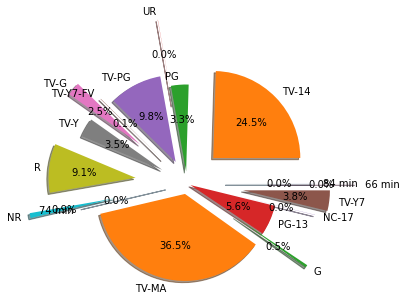

In [89]:
### Visualizing ratings
frequencyObject = getFrequency(df['rating'])


plt.pie(frequencyObject,
    labels = list(set(df['rating'])),
    startangle = 0,
    shadow = True,
    explode=getExplode(frequencyObject),
    autopct='%1.1f%%'
)
plt.show()

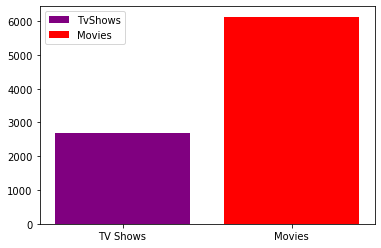

In [13]:
# Visualizing number of tv shows vs number of movies
lengthClasses = [len(movies), len(shows)]
classes = ['Movies', 'TV Shows']

plt.bar(classes[1], lengthClasses[1], label='TvShows', color='purple')
plt.bar(classes[0], lengthClasses[0], label='Movies', color='red')
plt.legend()
plt.show()

In [16]:
len(shows)

2676

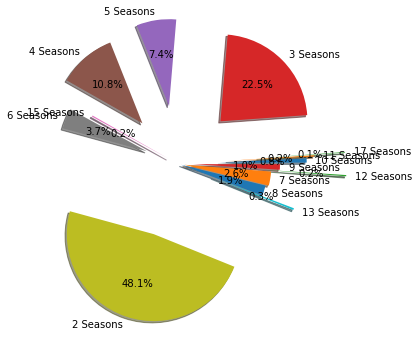

In [91]:
### Visualizing Shows based on number of seasons
seasons = [element for element in df['duration'] if 'Seasons' in element]
frequencySeasons = getFrequency(seasons)

plt.pie(frequencySeasons,
    labels = set(list(seasons)),
    startangle = 0,
    shadow = True,
    explode=getExplode(frequencySeasons),
    autopct='%1.1f%%'
)
plt.show()

below graph - lengthMovies[0] and lengthMovies[1]

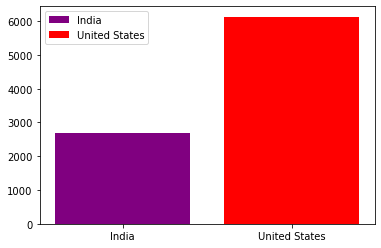

In [14]:
### Visualize the distribution of movies produced in India vs United States
lengthMovies = [len(countryMovies.iloc[0][0]), len(countryMovies.iloc[1][0])]
country = [countryMovies.index[0], countryMovies.index[1]]

plt.bar(country[1], lengthClasses[1], label='India', color='purple') 
plt.bar(country[0], lengthClasses[0], label='United States', color='red')
plt.legend()
plt.show()

In [31]:
len(countryMovies[0][0])

2058

In [32]:
len(countryMovies.iloc[0][0])

2058

# Part 3

## Observation for Part 1

We have noticed that that the rows of the dataset can be displayed using "pandas.DataFrame.head()" method.<br>
We have used a few parameters that convert the dates from mm/dd/yy format to dd/mm/yy format.<br>
We can replace the missing values (AKA NaN values) by using the "fillna()" method.<br>
We can calculate mean by label encoding data, median by floor dividing the length of the data by 2, mode by using getMode() function which calculates the most frequent element. <br>
the "info()" method is very usefull to get an overview of the data <br>
We have iterated throught the data to filter the country, type <br>

# Observation for Part 2

We have seen that we can use a Pie Chart to Visualize the Ratings Column. A Pie chart is very helpful as it shows the frequency in percentages.
We have usen a Bar Graph to visualize Tv Shows VS Movies. It is very helpful to show a low amount of classes and their frequencies.
We have again usen pie chart to visualize the Tv Shows based on number of seasons
we have usen a bar chart to visualize movies that have been produced in India versus those
produced in the United States as a Bar chart is very helpful with low amount of classes.